# Clingraph quick start with Jupyter

We present in this notebook the basic functionalities of clingraph. First we show the python package functionality, followed by some examples of the command line features.

We suggest that the user first gets familiarized with the accepted [syntax](https://clingraph.readthedocs.io/en/latest/clingraph/syntax.html).

For the details on the package options please go to the [api documentation](https://clingraph.readthedocs.io/en/latest/clingraph/api.html#clingraph).

For advanced examples on how to use the command line see our [documentation](https://clingraph.readthedocs.io/en/latest/clingraph/console.html#) and [examples folder](https://github.com/potassco/clingraph/tree/master/examples). Each subfolder contains a README that explains how to run the example. 

## Install
The installation is **ONLY** necessary for online usage in [binder](https://mybinder.org).

`!cd .. ; pip install . > /dev/null ; cd docs`

## Basic usage

In [1]:
import clingraph
from clingraph import Clingraph

### Create a clingraph from string

Loads a string of facts and computes the [graphviz objects](https://graphviz.readthedocs.io/en/stable/) by calling `compute_graphs()`.

In [4]:
g = Clingraph()
g.add_fact_string('''
node(oscar). 
node(andres). 
edge((oscar,andres)). 
attr(node,andres,label,"Andres").
attr(node,oscar,label,"Oscar").
attr(edge,(oscar,andres),label,"friends").''')
g.compute_graphs()

##### Show the cligraph object

'default'

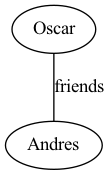

In [5]:
g

##### Print a clingraph source code

This source code uses the [DOT Language](https://graphviz.org/doc/info/lang.html)

In [6]:
print(g.source())

//----------default----------
graph default {
	andres [label=Andres]
	oscar [label=Oscar]
	oscar -- andres [label=friends]
}



##### Get the graphviz object

Obtains the graphviz object for the default graph

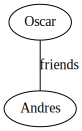

In [7]:
g.get_graphviz()

### Create a clingraph from file

The file contents representing two different graphs.

In [8]:
!cat ../examples/basic/example2/example_2.lp

    graph(toms_family).
    graph(bills_family).

    node(tom, toms_family).
    node(max, toms_family).
    edge((tom, max), toms_family).

    node(bill, bills_family).
    node(jen, bills_family).
    edge((bill, jen), bills_family).


##### Load the facts in the file

In [9]:
g = Clingraph()
g.add_fact_file("../examples/basic/example2/example_2.lp")

##### Add additional facts from a string and compute the graphs

In [10]:
g.add_fact_string("attr(graph_nodes,toms_family,color,red).attr(graph_nodes,bills_family,color,blue).")
g.compute_graphs()

##### Show the clingraph which contains two different graphs

'toms_family'

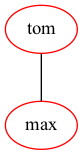

'bills_family'

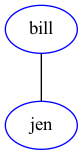

In [11]:
g

##### Get the graphviz object for a specific graph

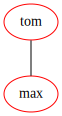

In [12]:
g.get_graphviz('toms_family')

##### Show source of one graph

In [13]:
print(g.get_graphviz('toms_family').source)

graph toms_family {
	node [color=red]
	tom
	max
	tom -- max
}



##### Save all graphs 

In [14]:
g.save(directory="out",format="pdf")

## Clingo integration

We show how to integrate clingraph with the [clingo API](https://www.cs.uni-potsdam.de/~kaminski/pyclingo-cffi/clingo/index.html).

For this we use a `MultiModelClingraph` that can handle one Clingraph for each stable model.

### Create a clingraph from each model retuned in the clingos solve

This is achived my passing the `g.add_model` method in the `on_model` callback argument for `solve`.

In this case our program has two stable models. One with `node(a)` and the other one with `node(b)`

In [15]:
from clingraph import MultiModelClingraph
from clingo import Control
ctl = Control(["-n2"])
g = MultiModelClingraph()
ctl.add("base", [], "1{node(a);node(b)}1.")
ctl.ground([("base", [])])
ctl.solve(on_model=g.add_model)
print(g.source())


//=========================
//	Model: 1 Costs: [] 
//=========================

// Graph hasn't been computed yet

//=========================
//	Model: 2 Costs: [] 
//=========================

// Graph hasn't been computed yet



In [16]:
g.compute_graphs()

In [17]:
print(g.source())


//=========================
//	Model: 1 Costs: [] 
//=========================

//----------default----------
graph default {
	a
}

//=========================
//	Model: 2 Costs: [] 
//=========================

//----------default----------
graph default {
	b
}



##### Print the clingraphs obtained for each model

In [18]:
g.clingraphs

{1: {'clingraph': <clingraph.clingraph.Clingraph at 0x1128670a0>,
  'name': 'model-0001',
  'costs': []},
 2: {'clingraph': <clingraph.clingraph.Clingraph at 0x112875de0>,
  'name': 'model-0002',
  'costs': []}}

##### Obtain the clingraph for the first model

'default'

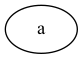

In [19]:
g.get_clingraph(1)

##### Obtain the clingraph for the second model

'default'

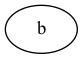

In [20]:
g.get_clingraph(2)

##### Show the source code of the first model

In [22]:
print(g.get_clingraph(1).source())

//----------default----------
graph default {
	a
}



## Command line

Clingraph can be called from the command line with `clingraph`. 

##### Show example contents

In [33]:
!cat ../examples/basic/example3/example_3.lp

graph(house).
graph(bathroom, house).
graph(bedroom, house).

node(toilet,bathroom).
node(bed,bedroom).
node(desk,bedroom).

edge((toilet,bed),house).


attr(graph, house, label, "Tom's House").
attr(graph, bathroom, style, dotted).
attr(graph, bathroom, label, "Bathroom").
attr(graph, bedroom, style, dotted).
attr(graph, bedroom, label, "Bedroom").

attr(graph_nodes, house, style, filled).
attr(graph_nodes, house, color, cyan).

attr(node, toilet, shape, circle).
attr(node, bed, shape, square).
attr(node, desk, shape, square).

attr(edge, (toilet,bed), color, red).


##### Run clingraph to compute the graphs and output the source

In [37]:
!clingraph ../examples/basic/example3/example_3.lp --render --format=png

//----------house----------
graph house {
	graph [label="Tom's House"]
	node [color=cyan style=filled]
	toilet -- bed [color=red]
	subgraph cluster_bathroom {
		graph [label=Bathroom style=dotted]
		toilet [shape=circle]
	}
	subgraph cluster_bedroom {
		graph [label=Bedroom style=dotted]
		bed [shape=square]
		desk [shape=square]
	}
}



#### Show the contents of the saved file `out/house.png`

Run this markdown cell to show the saved image:

![image](out/house.png)

### Clingo integration via command line

##### Show the example using clingo code

In [42]:
!cat ../examples/basic/example5/example_5.lp

1{node(a);node(b)}1.

attr(node,a,color,blue):-node(a).
attr(node,b,color,red):-node(b).


##### Run clingo and pipe the output to clingraph

Any logic program containing rules needs to be solved beforehand, then the facts are passed to clingraph. The special integration for clingo takes as input the json output from clingo obtained with option `--outf=2`.

In [43]:
!clingo ../examples/basic/example5/example_5.lp -n 0 --outf=2 | clingraph --json --select-model=1 --render --format=png

//----------default----------
graph default {
	a [color=blue]
}



Run this markdown cell to show the saved image:

![image_2](out/default.png)